In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(font_scale=1)
import matplotlib.pyplot as plt

plt.style.use('seaborn')

plt.rcParams['axes.unicode_minus'] = False # " - " 기호 Unicode 처리
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.simplefilter("ignore")

In [13]:
file_name = './ETF_2022-07-19.csv'
df = pd.read_csv(file_name, dtype={'종목코드':object})

In [14]:
df.shape

(593, 17)

In [15]:
df.head()

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지(H)
0,069500,1,KODEX 200,31425,5,-155,-0.49,31510.0,-10.6016,2100418,65964,52118,국내 시장지수,KODEX,False,False,False
1,371460,4,TIGER 차이나전기차SOLACTIVE,17125,5,-365,-2.09,17176.0,32.8018,6904743,119235,37908,해외 주식,TIGER,False,False,False
2,122630,3,KODEX 레버리지,14780,5,-150,-1.00,14837.0,-21.4418,20353741,300394,24128,국내 파생,KODEX,False,True,False
3,133690,4,TIGER 미국나스닥100,69990,5,-1230,-1.73,69796.0,-6.4225,99724,6986,20724,해외 주식,TIGER,False,False,False
4,102110,1,TIGER 200,31495,5,-150,-0.47,31576.0,-10.5467,820110,25811,20362,국내 시장지수,TIGER,False,False,False


In [16]:
df.tail()

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지(H)
588,252720,2,KBSTAR 모멘텀밸류,11900,5,-90,-0.75,11930.0,-13.5732,7,0,12,국내 업종/테마,KBSTAR,False,False,False
589,284990,2,KBSTAR 200에너지화학,9865,2,65,0.66,9890.0,-11.8706,72,0,10,국내 업종/테마,KBSTAR,False,False,False
590,287330,2,KBSTAR 200생활소비재,6555,5,-20,-0.30,6589.0,-9.0344,2575,16,9,국내 업종/테마,KBSTAR,False,False,False
591,287320,2,KBSTAR 200산업재,10795,2,65,0.61,10820.0,-8.6887,8,0,9,국내 업종/테마,KBSTAR,False,False,False
592,287310,2,KBSTAR 200경기소비재,9560,2,95,1.00,9595.0,-4.0742,17,0,8,국내 업종/테마,KBSTAR,False,False,False


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   종목코드        593 non-null    object 
 1   탭코드         593 non-null    int64  
 2   종목명         593 non-null    object 
 3   현재가         593 non-null    int64  
 4   등락구분        593 non-null    int64  
 5   전일비         593 non-null    int64  
 6   등락률         593 non-null    float64
 7   순자산가치(NAV)  593 non-null    float64
 8   3개월수익률      551 non-null    float64
 9   거래량         593 non-null    int64  
 10  거래대금(백만)    593 non-null    int64  
 11  시가총액(억)     593 non-null    int64  
 12  유형          593 non-null    object 
 13  브랜드         593 non-null    object 
 14  인버스         593 non-null    bool   
 15  레버리지        593 non-null    bool   
 16  환헤지(H)      593 non-null    bool   
dtypes: bool(3), float64(3), int64(7), object(4)
memory usage: 66.7+ KB


In [18]:
df.describe()

,탭코드,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억)
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,551.000000,5.930000e+02,593.000000,593.000000
mean,3.392917,18837.436762,3.986509,-49.426644,-0.269359,18838.568297,-8.099360,4.853816e+05,3767.930860,1249.615514
std,1.827645,23896.123703,1.370473,142.940908,0.901678,23896.912924,10.371916,6.033648e+06,27400.099937,3883.942079
min,1.000000,2225.000000,2.000000,-1230.000000,-3.610000,514.000000,-35.990100,0.000000e+00,0.000000,8.000000
25%,2.000000,8285.000000,2.000000,-95.000000,-0.670000,8363.000000,-14.029750,9.400000e+01,1.000000,76.000000
50%,3.000000,10500.000000,5.000000,-30.000000,-0.270000,10528.000000,-10.100900,1.553000e+03,18.000000,159.000000
75%,4.000000,14775.000000,5.000000,15.000000,0.110000,14805.000000,-0.723900,1.885000e+04,218.000000,641.000000
max,7.000000,111425.000000,5.000000,565.000000,4.800000,111462.000000,35.642300,1.386615e+08,443280.000000,52118.000000


In [19]:
df.isnull().sum() # 3개월수익률 : 상장일이 3개월에 못미치는 기업이 있어 NaN 값 존재

종목코드           0
탭코드            0
종목명            0
현재가            0
등락구분           0
전일비            0
등락률            0
순자산가치(NAV)     0
3개월수익률        42
거래량            0
거래대금(백만)       0
시가총액(억)        0
유형             0
브랜드            0
인버스            0
레버리지           0
환헤지(H)         0
dtype: int64

#### 범주형 변수의 기술통계

In [20]:
df.describe(include=object)

,종목코드,종목명,유형,브랜드
count,593,593,593,593
unique,593,593,7,23
top,069500,KODEX 200,국내 업종/테마,TIGER
freq,1,1,210,142


In [21]:
df.describe(exclude=np.number)

,종목코드,종목명,유형,브랜드,인버스,레버리지,환헤지(H)
count,593,593,593,593,593,593,593
unique,593,593,7,23,2,2,2
top,069500,KODEX 200,국내 업종/테마,TIGER,False,False,False
freq,1,1,210,142,552,555,551


In [23]:
# unique 값에 대한 빈도수
df.nunique()

종목코드          593
탭코드             7
종목명           593
현재가           539
등락구분            3
전일비           113
등락률           261
순자산가치(NAV)    589
3개월수익률        550
거래량           486
거래대금(백만)      251
시가총액(억)       396
유형              7
브랜드            23
인버스             2
레버리지            2
환헤지(H)          2
dtype: int64

- 탭코드, 등락구분, 유형, 브랜드, 인버스, 레버리지, 환헤지H 는 범주형에 가까운 데이터

#### 유형에 대한 빈도수 구하기 

In [24]:
df['유형'].value_counts()

국내 업종/테마    210
해외 주식       149
국내 시장지수      66
채권           62
기타           51
국내 파생        37
원자재          18
Name: 유형, dtype: int64

#### 시각화 ( countplot )

<AxesSubplot:xlabel='유형', ylabel='count'>

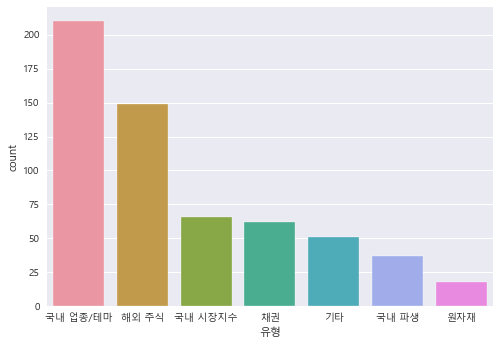

In [27]:
sns.countplot(data=df, x='유형', order=df['유형'].value_counts().index)

In [28]:
df['유형'].value_counts(normalize=True) * 100

국내 업종/테마    35.413153
해외 주식       25.126476
국내 시장지수     11.129848
채권          10.455312
기타           8.600337
국내 파생        6.239460
원자재          3.035413
Name: 유형, dtype: float64

<AxesSubplot:xlabel='count', ylabel='유형'>

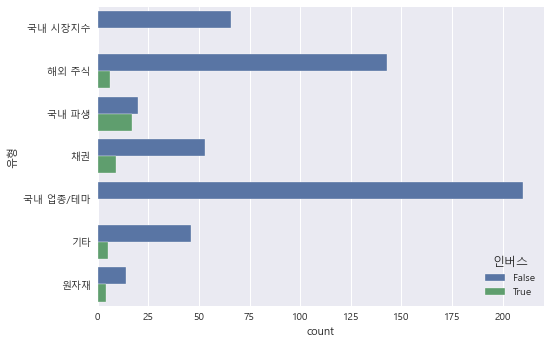

In [31]:
sns.countplot(data=df, y='유형', hue='인버스')

<AxesSubplot:xlabel='count', ylabel='유형'>

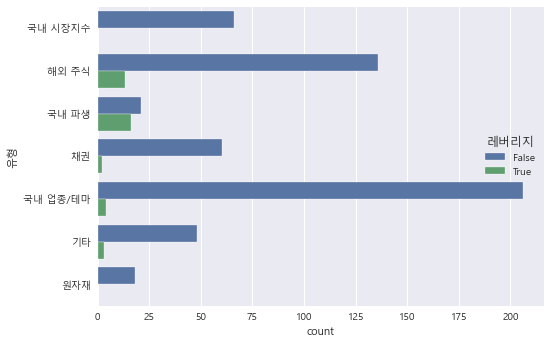

In [32]:
sns.countplot(data=df, y='유형', hue='레버리지')

#### 브랜드별 빈도수

In [34]:
df['브랜드'].value_counts()

TIGER        142
KODEX        139
KBSTAR        88
KINDEX        57
ARIRANG       53
HANARO        32
KOSEF         29
SOL           15
TIMEFOLIO      6
히어로즈           5
파워             4
FOCUS          3
에셋플러스          3
HK             3
WOORI          2
마이다스           2
TREX           2
MASTER         2
마이티            2
KTOP           1
대신343          1
VITA           1
UNICORN        1
Name: 브랜드, dtype: int64

<AxesSubplot:xlabel='count', ylabel='브랜드'>

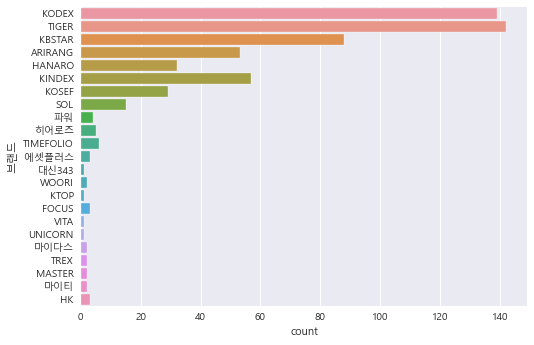

In [33]:
sns.countplot(data=df, y='브랜드')

#### 인버스, 브랜드의 빈도수

In [37]:
pd.crosstab(df['인버스'], df['브랜드'])

브랜드,ARIRANG,FOCUS,HANARO,HK,KBSTAR,KINDEX,KODEX,KOSEF,KTOP,MASTER,...,TREX,UNICORN,VITA,WOORI,대신343,마이다스,마이티,에셋플러스,파워,히어로즈
인버스,,,,,,,,,,,,,,,,,,,,,
False,50,3,31,3,78,53,128,24,1,2,...,2,1,1,2,1,2,2,3,4,5
True,3,0,1,0,10,4,11,5,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
pd.crosstab(df['인버스'], df['브랜드'], normalize=True) * 100

브랜드,ARIRANG,FOCUS,HANARO,HK,KBSTAR,KINDEX,KODEX,KOSEF,KTOP,MASTER,...,TREX,UNICORN,VITA,WOORI,대신343,마이다스,마이티,에셋플러스,파워,히어로즈
인버스,,,,,,,,,,,,,,,,,,,,,
False,8.431703,0.505902,5.227656,0.505902,13.153457,8.937605,21.585160,4.047218,0.168634,0.337268,...,0.337268,0.168634,0.168634,0.337268,0.168634,0.337268,0.337268,0.505902,0.674536,0.84317
True,0.505902,0.000000,0.168634,0.000000,1.686341,0.674536,1.854975,0.843170,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


<AxesSubplot:ylabel='브랜드'>

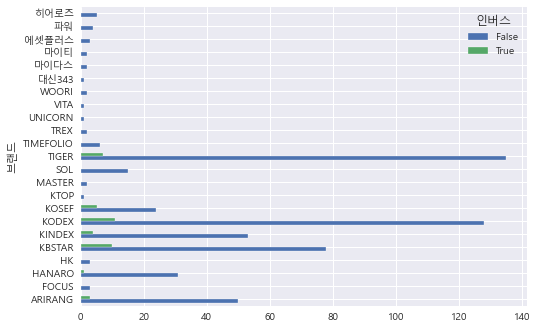

In [40]:
pd.crosstab(df['인버스'], df['브랜드']).T.plot.barh()

In [41]:
desc = df.describe()

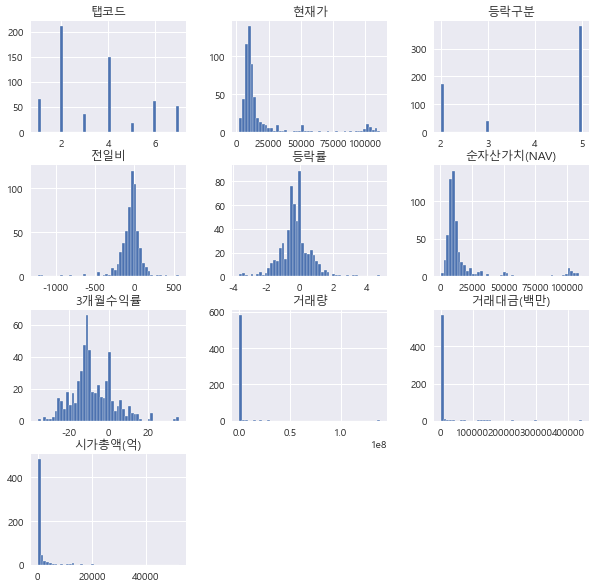

In [42]:
df[desc.columns].hist(figsize=(10, 10), bins=50);

#### 3개월 수익률 시각화

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

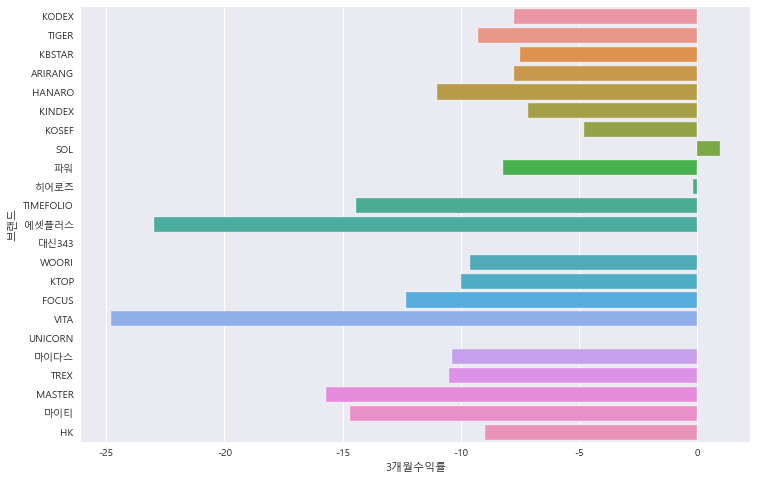

In [45]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, y='브랜드', x='3개월수익률', ci=None)

In [47]:
# KODEX 추출 후 kodex 에 담기
kodex = df.query("브랜드 == 'KODEX'")

In [48]:
kodex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 0 to 560
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   종목코드        139 non-null    object 
 1   탭코드         139 non-null    int64  
 2   종목명         139 non-null    object 
 3   현재가         139 non-null    int64  
 4   등락구분        139 non-null    int64  
 5   전일비         139 non-null    int64  
 6   등락률         139 non-null    float64
 7   순자산가치(NAV)  139 non-null    float64
 8   3개월수익률      133 non-null    float64
 9   거래량         139 non-null    int64  
 10  거래대금(백만)    139 non-null    int64  
 11  시가총액(억)     139 non-null    int64  
 12  유형          139 non-null    object 
 13  브랜드         139 non-null    object 
 14  인버스         139 non-null    bool   
 15  레버리지        139 non-null    bool   
 16  환헤지(H)      139 non-null    bool   
dtypes: bool(3), float64(3), int64(7), object(4)
memory usage: 16.7+ KB


<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

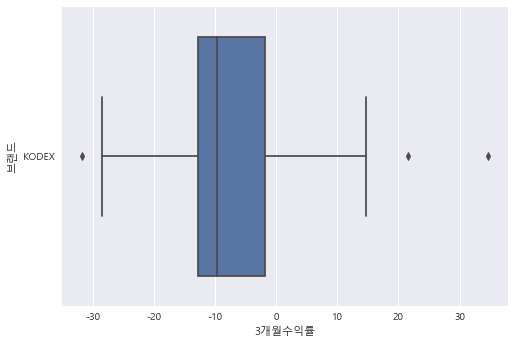

In [51]:
sns.boxplot(data=kodex, x='3개월수익률', y='브랜드')

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

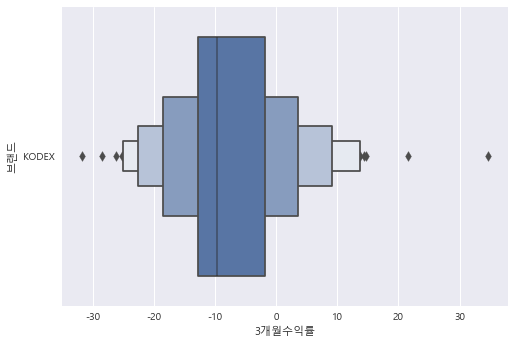

In [52]:
sns.boxenplot(data=kodex, x='3개월수익률', y='브랜드')

<AxesSubplot:>

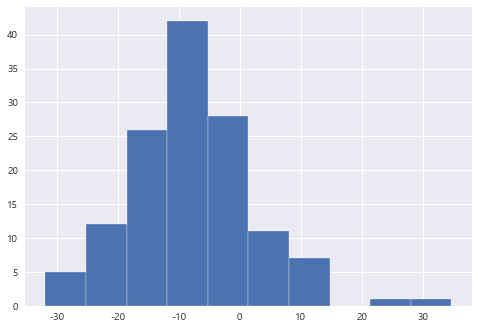

In [53]:
kodex['3개월수익률'].hist()

<AxesSubplot:xlabel='3개월수익률', ylabel='Density'>

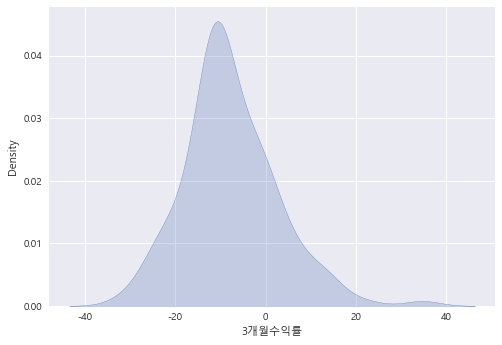

In [54]:
sns.kdeplot(data=kodex, x='3개월수익률', shade=True)

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

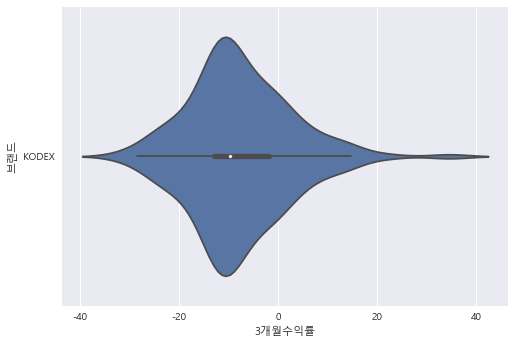

In [55]:
sns.violinplot(data=kodex, x='3개월수익률', y='브랜드')

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

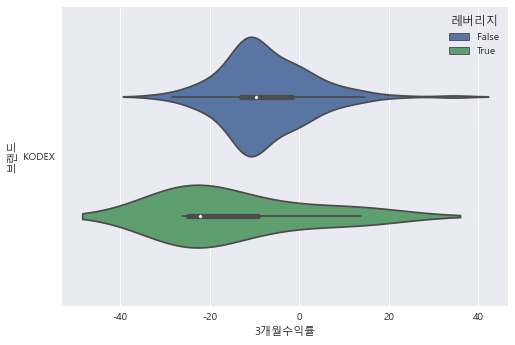

In [56]:
sns.violinplot(data=kodex, x='3개월수익률', y='브랜드', hue='레버리지')

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

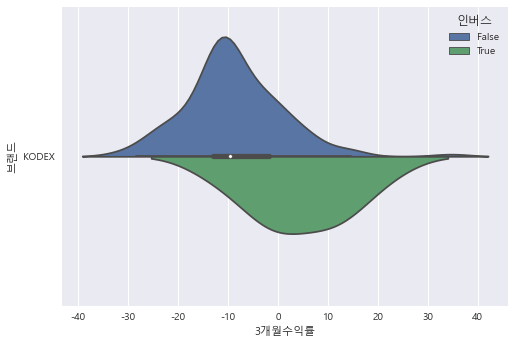

In [57]:
sns.violinplot(data=kodex, x='3개월수익률', y='브랜드', hue='인버스', split=True)

- barplot : 평균값만으로 그려냄
- boxplot : 평균값만으로는 볼 수 없는 부분을 보기위해 그려냄 ( 25%, 50% ... )
 - 단점 > low_data 가 바뀔 때 그 부분이 잘 보이지 않음 ( 해결 : histogram, kde 그림 )
- violinplot : boxplot + kde